In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/NorESM1-M/noresm_pr_197001-200512.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:36:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [3]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data


/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_4053/3137857967.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1970-01-01 00:00:00 ... 2006-01-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:36:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:36:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:36:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[4.81011411e-05, 4.59786970e-05, 4.58172472e-05, ...,
        9.30845636e-05, 8.17372202e-05, 6.78281867e-05],
       [4.65236117e-05, 4.17561387e-05, 4.31987719e-05, ...,
        7.58888636e-05, 6.86034618e-05, 6.38118654e-05],
       [4.85145792e-05, 3.61120110e-05, 3.27348462e-05, ...,
        6.39763311e-05, 6.34248281e-05, 6.31069852e-05],
       ...,
       [8.30645513e-05, 5.43634160e-05, 1.64175162e-05, ...,
        9.96205927e-05, 1.19866287e-04, 1.75291891e-04],
       [1.08147884e-04, 4.63827128e-05, 1.96373821e-05, ...,
        1.23150036e-04, 1.35789174e-04, 1.94978958e-04],
       [1.11327521e-04, 5.90303025e-05, 2.88651772e-05, ...,
        1.79944953e-04, 1.93514425e-04, 2.33033366e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [10]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[ 4.1559386 ,  3.97255942,  3.95861015, ...,  8.04250629,
         7.06209582,  5.86035533],
       [ 4.01964005,  3.60773038,  3.73237389, ...,  6.55679782,
         5.9273391 ,  5.51334517],
       [ 4.19165965,  3.12007775,  2.82829071, ...,  5.52755501,
         5.47990515,  5.45244352],
       ...,
       [ 7.17677723,  4.69699914,  1.4184734 , ...,  8.60721921,
        10.35644717, 15.14521935],
       [ 9.34397718,  4.00746638,  1.69666982, ..., 10.64016307,
        11.73218465, 16.84618201],
       [ 9.61869783,  5.10021814,  2.49395131, ..., 15.54724392,
        16.71964629, 20.13408286]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

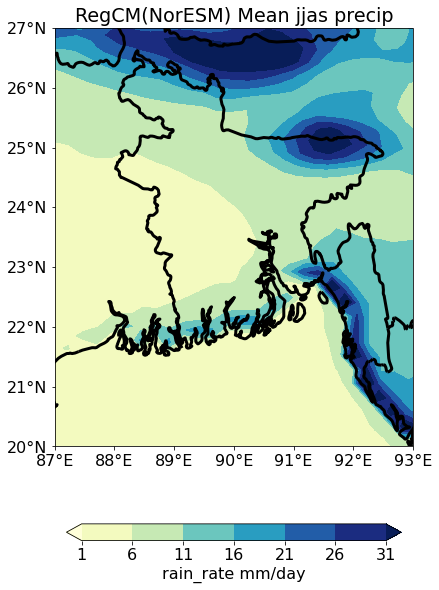

In [11]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('RegCM(NorESM) Mean jjas precip')
 

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_noresm_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [12]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[2.3669582e-04, 2.0229594e-04, 1.9181645e-04, ..., 4.7668222e-05,
        4.1542058e-05, 3.4619028e-05],
       [2.2543482e-04, 1.7630671e-04, 1.7071735e-04, ..., 4.0747836e-05,
        3.6765097e-05, 3.4187051e-05],
       [2.5681147e-04, 2.0701512e-04, 1.7389543e-04, ..., 3.4585366e-05,
        3.4235218e-05, 3.5077454e-05],
       ...,
       [6.6490291e-05, 6.2065388e-05, 2.6922229e-05, ..., 3.9356652e-05,
        4.6418409e-05, 6.6928362e-05],
       [1.1090200e-04, 5.3344731e-05, 3.5821009e-05, ..., 4.8577702e-05,
        5.2868458e-05, 7.4240372e-05],
       [1.3627741e-04, 6.0546219e-05, 5.9238639e-05, ..., 6.9291840e-05,
        7.4467098e-05, 8.8560664e-05]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

In [13]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[20.45051898, 17.47836904, 16.57294119, ...,  4.11853435,
         3.58923383,  2.99108403],
       [19.47756861, 15.23289992, 14.74997909, ...,  3.52061307,
         3.17650441,  2.9537612 ],
       [22.18851121, 17.88610672, 15.02456521, ...,  2.98817562,
         2.95792281,  3.03069198],
       ...,
       [ 5.74476114,  5.36244954,  2.3260806 , ...,  3.40041469,
         4.0105505 ,  5.78261046],
       [ 9.58193291,  4.60898476,  3.09493518, ...,  4.19711344,
         4.56783475,  6.41436812],
       [11.77436784,  5.23119334,  5.11821838, ...,  5.98681499,
         6.43395726,  7.65164138]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

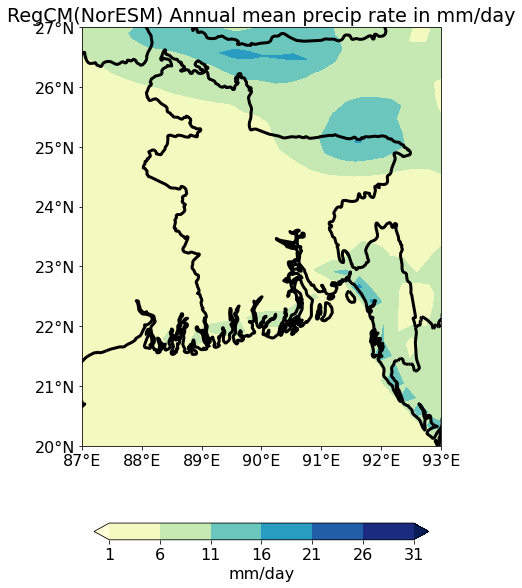

In [14]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#ax.add_feature(cfeature.STATES)
#plt.title('RegCM(NorESM1-M) Annual mean precip rate in mm/day',fontweight='bold',fontsize=15)

plt.title('RegCM(NorESM) Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_noresm_annual_mean.png")


